In [1]:
import pandas
import numpy as np

%matplotlib inline

In [2]:
raw_tea_df = pandas.read_csv("./scraper/tea.csv")

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
tea_df = raw_tea_df.drop(['url'], axis=1)
tea_df = tea_df.set_index('id')
tea_df.head()

,name,brand,reviewCount,ratingValue,ingredients,flavors,soldIn,caffeine,certification,wantIt,ownIt
id,,,,,,,,,,,
20060,Hand Picked Tieguanyin Spring Oolong (2011),Verdant Tea,79,89,Oolong Tea,"Sugar, Flowers, Berries, Berry, White Chocolat...",Loose Leaf,Medium,Not available,139,140
7839,J.E Oolong Milky,THE O DOR,26,89,Oolong Tea,"Milk, Creamy, Butter",Loose Leaf,Not available,Kosher,47,35
8188,Golden Honey Dew,Lupicia,64,89,"Green Rooibos, Honeydew, Marigold Flowers","Honey Dew, Green Melons, Honeydew, Melon, Roas...","Loose Leaf, Sachet",Caffeine Free,Not available,61,52
41785,Imperial Gold Needle Yunnan Black Tea,Yunnan Sourcing,25,89,Not available,"Chocolate, Cocoa, Malt, Melon, Plums, Sweet Po...",Loose Leaf,Not available,Not available,40,33
19426,Ye Sheng Wild White,Canton Tea Co,10,89,Not available,"Flowers, Grapes, Vegetal",Not available,Not available,Not available,15,8


**Fix ratingValue**

In [4]:
tea_df[tea_df.ratingValue == "--"] = np.NaN
tea_df.ratingValue = tea_df.ratingValue.astype(float)

**Remove missing values**

In [5]:
print("Number of missing values:")
tea_df.isnull().sum()

Number of missing values:


name             20958
brand            20958
reviewCount      20958
ratingValue      20958
ingredients      20958
flavors          20958
soldIn           20958
caffeine         20958
certification    20958
wantIt           20958
ownIt            20958
dtype: int64

In [6]:
tea_df = tea_df.dropna(axis=0, how='all')
print("Number of missing values:")
tea_df.isnull().sum()

Number of missing values:


name             0
brand            0
reviewCount      0
ratingValue      0
ingredients      0
flavors          0
soldIn           0
caffeine         0
certification    0
wantIt           0
ownIt            0
dtype: int64

**Describe data**

In [7]:
tea_df.describe()

,reviewCount,ratingValue,wantIt,ownIt
count,47243.000000,47243.000000,47243.000000,47243.000000
mean,4.417586,76.729971,1.711978,4.248312
std,13.613892,5.533160,7.119419,18.561321
min,0.000000,25.000000,0.000000,0.000000
25%,1.000000,74.000000,0.000000,0.000000
50%,1.000000,78.000000,0.000000,1.000000
75%,3.000000,80.000000,1.000000,3.000000
max,671.000000,89.000000,315.000000,979.000000


In [8]:
tea_df.describe(include=[np.object])

,name,brand,ingredients,flavors,soldIn,caffeine,certification
count,47243,47243,47243,47243,47243,47243,47243
unique,37240,5551,5456,12670,16,6,16
top,Earl Grey,Yunnan Sourcing,Not available,Not available,Not available,Not available,Not available
freq,239,915,36713,31611,32696,40003,43921


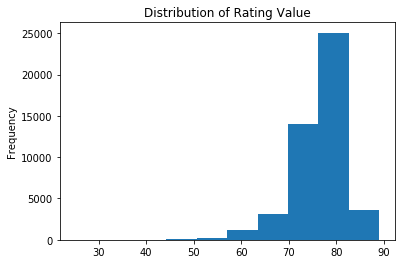

In [9]:
tea_df.ratingValue.plot('hist', title="Distribution of Rating Value")

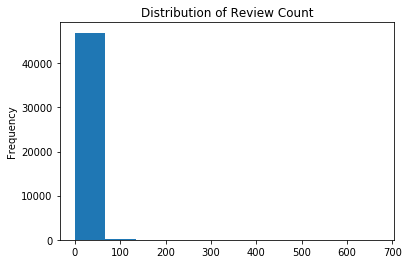

In [10]:
tea_df.reviewCount.plot('hist', title="Distribution of Review Count")

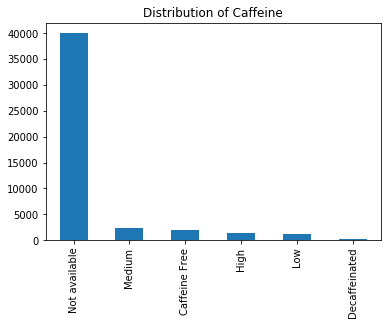

In [11]:
tea_df.caffeine.value_counts().plot('bar', title="Distribution of Caffeine")

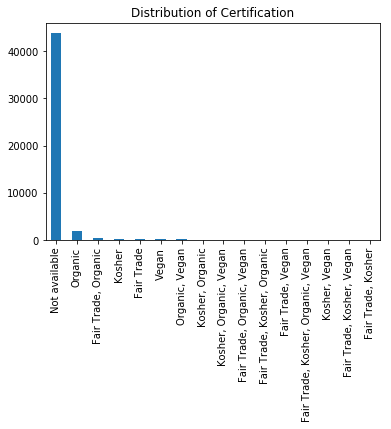

In [12]:
tea_df.certification.value_counts().plot('bar',  title="Distribution of Certification")

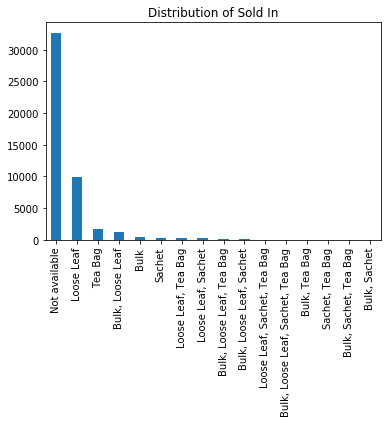

In [13]:
tea_df.soldIn.value_counts().plot('bar', title="Distribution of Sold In")